# Packages

In [24]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("edgeR")
BiocManager::install("AnnotationDbi")
BiocManager::install("org.Mm.eg.db")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'edgeR'”
Old packages: 'aplot', 'ggfun', 'rmarkdown'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'AnnotationDbi'”
Old packages: 'aplot', 'ggfun', 'rmarkdown'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", pack

In [25]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [26]:
library("edgeR")
library("dplyr")
library("AnnotationDbi")
library("org.Mm.eg.db")

# DEG (differentially expressed genes) using EdgeR

In [27]:
# Load raw count data
raw_counts <- read.table("/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/data/GSE130609_raw_counts_all_samples.txt", header = TRUE, row.names = 1)
head(raw_counts)

,N4_1000_S10,N4_1000_S11,N4_50000_S1,N4_50000_S2,N4_50000_S3,N4_50000_S4,T4_50000_S6,T4_50000_S7,T4_50000_S8,N4_1000_S9
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000102693,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000051951,0,3,0,0,0,0,0,0,3,0
ENSMUSG00000102851,0,1,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0,2,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0,2,0


In [28]:
# selecting required coloums only, IF NEEDED

raw_count_selected <- raw_counts[,c("N4_50000_S1","N4_50000_S2","N4_50000_S3","N4_50000_S4","T4_50000_S6","T4_50000_S7","T4_50000_S8")]
head(raw_count_selected)

,N4_50000_S1,N4_50000_S2,N4_50000_S3,N4_50000_S4,T4_50000_S6,T4_50000_S7,T4_50000_S8
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000102693,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,0,0,0
ENSMUSG00000051951,0,0,0,0,0,0,3
ENSMUSG00000102851,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,2
ENSMUSG00000104017,0,0,0,0,0,0,2


In [29]:
# create groups for the samples
# here we have 2 groups for this analysis (original dataset had 3, we selected 2)

group <- factor(c('1','1','1','1','2','2','2'))

# for this dataset we had 3 groups, so below 2 lines are if we are using these 3 groups
# group <- factor(c('N4_1000','N4_1000','N4_50000','N4_50000','N4_50000','N4_50000','T4_50000','T4_50000','T4_50000','N4_1000'))
# group <- factor(c('3','3','1','1','1','1','2','2','2','3'))

str(group)

 Factor w/ 2 levels "1","2": 1 1 1 1 2 2 2


In [30]:
# dgeGlm - Digital Gene Expression Generalized Linear Model

# The DGEList object holds the dataset to be analysed by edgeR and the subsequent calculations performed on the dataset.
# Specifically it contains: counts. numeric matrix containing the read counts.

dgeGlm <- DGEList(counts=raw_count_selected, group =group)
head(dgeGlm)
str(dgeGlm)

An object of class "DGEList"
$counts
                   N4_50000_S1 N4_50000_S2 N4_50000_S3 N4_50000_S4 T4_50000_S6
ENSMUSG00000102693           0           0           0           0           0
ENSMUSG00000064842           0           0           0           0           0
ENSMUSG00000051951           0           0           0           0           0
ENSMUSG00000102851           0           0           0           0           0
ENSMUSG00000103377           0           0           0           0           0
ENSMUSG00000104017           0           0           0           0           0
                   T4_50000_S7 T4_50000_S8
ENSMUSG00000102693           0           0
ENSMUSG00000064842           0           0
ENSMUSG00000051951           0           3
ENSMUSG00000102851           0           0
ENSMUSG00000103377           0           2
ENSMUSG00000104017           0           2

$samples
            group lib.size norm.factors
N4_50000_S1     1  5760708            1
N4_50000_S2     1  5850581            1
N4_50000_S3     1  5921966            1
N4_50000_S4     1  5724311            1
T4_50000_S6     2  5290806            1
T4_50000_S7     2  5352408            1
T4_50000_S8     2  4788787            1

Formal class 'DGEList' [package "edgeR"] with 1 slot
  ..@ .Data:List of 2
  .. ..$ : int [1:49671, 1:7] 0 0 0 0 0 0 0 0 0 2 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:49671] "ENSMUSG00000102693" "ENSMUSG00000064842" "ENSMUSG00000051951" "ENSMUSG00000102851" ...
  .. .. .. ..$ : chr [1:7] "N4_50000_S1" "N4_50000_S2" "N4_50000_S3" "N4_50000_S4" ...
  .. ..$ :'data.frame':	7 obs. of  3 variables:
  .. .. ..$ group       : Factor w/ 2 levels "1","2": 1 1 1 1 2 2 2
  .. .. ..$ lib.size    : num [1:7] 5760708 5850581 5921966 5724311 5290806 ...
  .. .. ..$ norm.factors: num [1:7] 1 1 1 1 1 1 1
  ..$ names: chr [1:2] "counts" "samples"


In [31]:
dgeGlm_normalized <- calcNormFactors(dgeGlm, method = "TMM") # method="TMM" is the weighted trimmed mean of M-values
head(dgeGlm_normalized)

An object of class "DGEList"
$counts
                   N4_50000_S1 N4_50000_S2 N4_50000_S3 N4_50000_S4 T4_50000_S6
ENSMUSG00000102693           0           0           0           0           0
ENSMUSG00000064842           0           0           0           0           0
ENSMUSG00000051951           0           0           0           0           0
ENSMUSG00000102851           0           0           0           0           0
ENSMUSG00000103377           0           0           0           0           0
ENSMUSG00000104017           0           0           0           0           0
                   T4_50000_S7 T4_50000_S8
ENSMUSG00000102693           0           0
ENSMUSG00000064842           0           0
ENSMUSG00000051951           0           3
ENSMUSG00000102851           0           0
ENSMUSG00000103377           0           2
ENSMUSG00000104017           0           2

$samples
            group lib.size norm.factors
N4_50000_S1     1  5760708    1.0390686
N4_50000_S2     1  5850581    1.0218323
N4_50000_S3     1  5921966    1.0262529
N4_50000_S4     1  5724311    0.9993120
T4_50000_S6     2  5290806    0.9762128
T4_50000_S7     2  5352408    0.9531082
T4_50000_S8     2  4788787    0.9870382

In [37]:
# I do not understand that clearly yet, so NEED TO REVISIT

# calculates the CPM (counts per million) values, checks if they are greater than 2,
# and then checks if at least 4 samples meet this condition for each gene

keep <- rowSums(cpm(dgeGlm_normalized)>2) >= 4
str(keep)
head(keep)

dgeGlm_normalized <- dgeGlm_normalized[keep,]
head(dgeGlm_normalized)
write.csv(dgeGlm_normalized$counts, "Selected_Samples_Group")


 Named logi [1:13198] TRUE TRUE TRUE TRUE TRUE TRUE ...
 - attr(*, "names")= chr [1:13198] "ENSMUSG00000102948" "ENSMUSG00000102269" "ENSMUSG00000098104" "ENSMUSG00000102175" ...


ENSMUSG00000102948 ENSMUSG00000102269 ENSMUSG00000098104 ENSMUSG00000102175 
              TRUE               TRUE               TRUE               TRUE 
ENSMUSG00000103922 ENSMUSG00000033845 
              TRUE               TRUE

An object of class "DGEList"
$counts
                   N4_50000_S1 N4_50000_S2 N4_50000_S3 N4_50000_S4 T4_50000_S6
ENSMUSG00000102948          12          20          13          16          12
ENSMUSG00000102269          40          35          22          23          25
ENSMUSG00000098104         384         445         351         444         406
ENSMUSG00000102175          34          21          28          24          17
ENSMUSG00000103922          78          59          43          58          62
ENSMUSG00000033845         144         185         211         176         179
                   T4_50000_S7 T4_50000_S8
ENSMUSG00000102948           7          38
ENSMUSG00000102269          33          22
ENSMUSG00000098104         380         357
ENSMUSG00000102175          19          16
ENSMUSG00000103922          84          33
ENSMUSG00000033845         172         163

$samples
            group lib.size norm.factors
N4_50000_S1     1  5760708    1.0390686
N4_50000_S2     1  5850581    1.0218323
N4_50000_S3     1  5921966    1.0262529
N4_50000_S4     1  5724311    0.9993120
T4_50000_S6     2  5290806    0.9762128
T4_50000_S7     2  5352408    0.9531082
T4_50000_S8     2  4788787    0.9870382

In [33]:
# model.matrix creates a design (or model) matrix, e.g., by expanding factors to a set of dummy variables 
design <- model.matrix(~group)
print(design)

  (Intercept) group2
1           1      0
2           1      0
3           1      0
4           1      0
5           1      1
6           1      1
7           1      1
attr(,"assign")
[1] 0 1
attr(,"contrasts")
attr(,"contrasts")$group
[1] "contr.treatment"



In [34]:
dgeGlm_normalized_ComDisp <- estimateGLMCommonDisp(dgeGlm_normalized, design, verbose = TRUE)

# It estimates a common negative binomial dispersion parameter for a DGE dataset with a general experimental design.
# The function uses the design matrix temporarily to estimate the dispersion.

Disp = 0.01812 , BCV = 0.1346 


In [38]:
dgeGlm_normalized_TrendDisp <- estimateGLMTrendedDisp (dgeGlm_normalized_ComDisp, design)
# print(dgeGlm_normalized_TrendDisp)

# Trended dispersion is the mean dispersion across all genes with similar abundance.
# It's the fitted value of the mean-dispersion trend.

In [40]:
dgeGlm_normalized_TagDisp <- estimateGLMTagwiseDisp (dgeGlm_normalized_TrendDisp, design)
# print(dgeGlm_normalized_TagDisp)

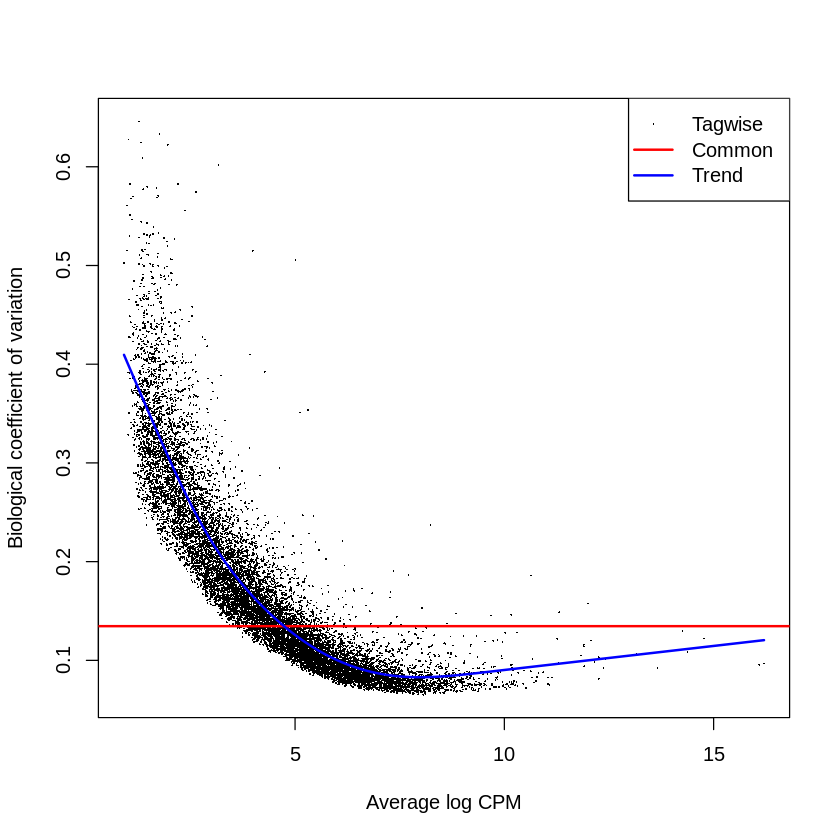

In [ ]:
plotBCV(dgeGlm_normalized_TagDisp)

In [48]:
fit <- glmFit(dgeGlm_normalized_TagDisp, design)

In [50]:
colnames(coef(fit))
lrt <- glmLRT(fit, coef=2)
# str(lrt)
print(lrt)

[1] "(Intercept)" "group2"

An object of class "DGELRT"
$coefficients
                   (Intercept)      group2
ENSMUSG00000102948  -12.862710  0.41054206
ENSMUSG00000102269  -12.192324  0.05385963
ENSMUSG00000098104   -9.588946  0.10727639
ENSMUSG00000102175  -12.306281 -0.25925318
ENSMUSG00000103922  -11.508113  0.16659796
13193 more rows ...

$fitted.values
                   N4_50000_S1 N4_50000_S2 N4_50000_S3 N4_50000_S4 T4_50000_S6
ENSMUSG00000102948    15.38568    15.36651    15.62129    14.70351    20.07383
ENSMUSG00000102269    30.20808    30.17044    30.67068    28.86871    27.51458
ENSMUSG00000098104   409.77990   409.26932   416.05513   391.61101   393.64168
ENSMUSG00000102175    26.93999    26.90643    27.35254    25.74552    17.91043
ENSMUSG00000103922    60.01129    59.93651    60.93028    57.35050    61.19045
                   T4_50000_S7 T4_50000_S8
ENSMUSG00000102948    19.82693    18.37061
ENSMUSG00000102269    27.17615    25.18002
ENSMUSG00000098104   388.79990   360.24191
ENSMUSG00000102175

In [ ]:
ttGlm <- topTags(lrt, n = Inf)
str(ttGlm)
# class(ttGlm)

Formal class 'TopTags' [package "edgeR"] with 1 slot
  ..@ .Data:List of 4
  .. ..$ :'data.frame':	13198 obs. of  5 variables:
  .. .. ..$ logFC : num [1:13198] -1.755 -1.135 -1.186 1.105 0.825 ...
  .. .. ..$ logCPM: num [1:13198] 6.96 8.53 9.69 6.97 8.27 ...
  .. .. ..$ LR    : num [1:13198] 177 135.7 121.2 98.9 90.5 ...
  .. .. ..$ PValue: num [1:13198] 2.17e-40 2.31e-31 3.46e-28 2.63e-23 1.89e-21 ...
  .. .. ..$ FDR   : num [1:13198] 2.86e-36 1.52e-27 1.52e-24 8.69e-20 4.98e-18 ...
  .. ..$ : chr "BH"
  .. ..$ : chr "group2"
  .. ..$ : chr "glm"
  ..$ names: chr [1:4] "table" "adjust.method" "comparison" "test"


       group2
Down      730
NotSig  11913
Up        555

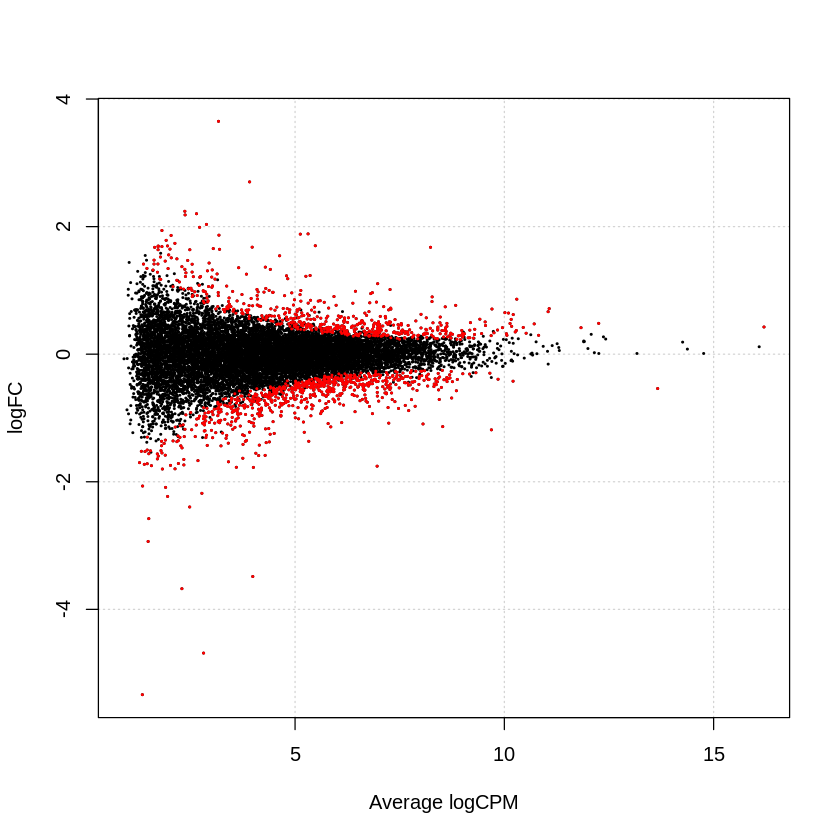

In [ ]:
summary(dgeGlm_normalized_Tests <- decideTestsDGE(lrt, p = 0.05, adjust = "fdr"))
tagsGlm <- rownames(dgeGlm_normalized_TagDisp)[as.logical(dgeGlm_normalized_Tests)]

plotSmear(lrt, de.tags = tagsGlm)

In [ ]:
defg_1vs2 <- ttGlm$table[ttGlm$table$FDR < 0.1,]
str(defg_1vs2)
write.csv(defg_1vs2, "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/results/DEG_EdgeR_1_vs_2.csv")

'data.frame':	1845 obs. of  5 variables:
 $ logFC : num  -1.755 -1.135 -1.186 1.105 0.825 ...
 $ logCPM: num  6.96 8.53 9.69 6.97 8.27 ...
 $ LR    : num  177 135.7 121.2 98.9 90.5 ...
 $ PValue: num  2.17e-40 2.31e-31 3.46e-28 2.63e-23 1.89e-21 ...
 $ FDR   : num  2.86e-36 1.52e-27 1.52e-24 8.69e-20 4.98e-18 ...


# Pathways

## Read Tables

In [ ]:
# kegg file has the path ways but ensembl_gene_id is not available
kegg_mmu <- read.table(file = "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/kegg_bm_mmu/kegg_mmu.txt", header = TRUE)
tail(kegg_mmu)

,mmu_name,category,region,external_gene_name,pathway_name,pathway
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
204856,mmu:15130,CDS,7 E3; 7 54.85 cM,Hbb2,mmu05143,African trypanosomiasis - Mus musculus (house mouse)
204857,mmu:15130,CDS,7 E3; 7 54.85 cM,Hbb2,mmu05144,Malaria - Mus musculus (house mouse)
204858,mmu:15130,CDS,7 E3; 7 54.85 cM,Hbbt2,mmu05143,African trypanosomiasis - Mus musculus (house mouse)
204859,mmu:15130,CDS,7 E3; 7 54.85 cM,Hbbt2,mmu05144,Malaria - Mus musculus (house mouse)
204860,mmu:15130,CDS,7 E3; 7 54.85 cM,beta2,mmu05143,African trypanosomiasis - Mus musculus (house mouse)
204861,mmu:15130,CDS,7 E3; 7 54.85 cM,beta2,mmu05144,Malaria - Mus musculus (house mouse)


In [ ]:
# to get the ensembl_gene_id associate4d with the external_gene_name we are using this file
bm_mmu <- read.table(file = "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/kegg_bm_mmu/bm_mmu.txt", header = TRUE)
tail(bm_mmu)

,ensembl_gene_id,external_gene_name,chromosome_name,start_position,end_position,strand,gene_biotype,description
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
56936,ENSMUSG00000039715,Dync2i2,2,29921558,29938893,-1,protein_coding,dynein 2 intermediate chain 2 [Source:MGI Symbol;Acc:MGI:1919070]
56937,ENSMUSG00000054766,Set,2,29947390,29962589,1,protein_coding,SET nuclear oncogene [Source:MGI Symbol;Acc:MGI:1860267]
56938,ENSMUSG00000026785,Pkn3,2,29967696,29981034,1,protein_coding,protein kinase N3 [Source:MGI Symbol;Acc:MGI:2388285]
56939,ENSMUSG00000015335,Zdhhc12,2,29980956,29983660,-1,protein_coding,"zinc finger, DHHC domain containing 12 [Source:MGI Symbol;Acc:MGI:1913470]"
56940,ENSMUSG00000039686,Zer1,2,29987295,30014597,-1,protein_coding,"zyg-11 related, cell cycle regulator [Source:MGI Symbol;Acc:MGI:2442511]"
56941,ENSMUSG00000100747,1700084E18Rik,2,30126807,30128235,-1,lncRNA,RIKEN cDNA 1700084E18 gene [Source:MGI Symbol;Acc:MGI:1914600]


In [ ]:
defg_1vs2 <- read.csv(file = "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/results/DEG_EdgeR_1_vs_2.csv", header = TRUE)
colnames(defg_1vs2)[1] <- "ensembl_gene_id"
tail(defg_1vs2)

,ensembl_gene_id,logFC,logCPM,LR,PValue,FDR
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1840,ENSMUSG00000029516,-0.7844909,2.847223,6.063522,0.01380022,0.09898656
1841,ENSMUSG00000024319,-0.3468158,4.929401,6.060156,0.01382655,0.09912154
1842,ENSMUSG00000095524,0.6428896,2.865234,6.052903,0.01388346,0.09944404
1843,ENSMUSG00000038346,-0.3169545,5.372781,6.052503,0.01388660,0.09944404
1844,ENSMUSG00000038271,-0.4489841,4.466885,6.047582,0.01392535,0.09966747
1845,ENSMUSG00000050390,1.0238452,2.448871,6.043419,0.01395823,0.09984862


## Merge

In [ ]:
# merged to use it with the results
bm_mmu_gene_id_name_only <- bm_mmu[,c("ensembl_gene_id","external_gene_name")]
defg_1vs2_external_gene_name <-merge(defg_1vs2, bm_mmu_gene_id_name_only, by = "ensembl_gene_id")
defg_1vs2_external_gene_name <- defg_1vs2_external_gene_name[,c("external_gene_name","ensembl_gene_id","logFC","logCPM","PValue","FDR")]
tail(defg_1vs2_external_gene_name)
write.csv(defg_1vs2_external_gene_name, "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/results/defg_1vs2_external_gene_name.csv")

,external_gene_name,ensembl_gene_id,logFC,logCPM,PValue,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1822,Aldoa-ps4,ENSMUSG00000111336,-0.7329402,2.946196,7.478161e-03,6.610634e-02
1823,Gm47050,ENSMUSG00000111546,2.0345687,2.883186,9.894778e-09,1.483992e-06
1824,Gm4977,ENSMUSG00000111613,0.2974393,6.420831,6.752465e-03,6.180238e-02
1825,Gm8543,ENSMUSG00000111684,0.5391290,6.010039,2.985342e-05,1.076517e-03
1826,Gm48720,ENSMUSG00000111690,-0.4512521,5.086407,2.400589e-03,3.020303e-02
1827,Gm6477,ENSMUSG00000111877,0.3471048,5.764690,1.879018e-03,2.546127e-02


In [ ]:
# # merged to use it with the results
# kegg_bm_mmu <-merge(kegg_mmu, bm_mmu, by = "external_gene_name")
# tail(kegg_bm_mmu)

In [ ]:
# defg_1vs2_kegg_bm_mmu <-merge(defg_1vs2, kegg_bm_mmu, by = "ensembl_gene_id")
# tail(defg_1vs2_kegg_bm_mmu)
# write.csv(defg_1vs2_kegg_bm_mmu, "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/results/defg_1vs2_kegg_bm_mmu.csv")

In [ ]:
# defg_1vs2_kegg_bm_mmu %>% group_by(ensembl_gene_id) %>% summarise(Count = n())

In [ ]:
# UpGenes <- defg_1vs2_kegg_bm_mmu[ defg_1vs2_kegg_bm_mmu$logFC > 0, ]
# DownGenes <- defg_1vs2_kegg_bm_mmu[ defg_1vs2_kegg_bm_mmu$logFC < 0,]

# write.csv(UpGenes, "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/results/UpGenes.csv")
# write.csv(DownGenes, "/scratch/ag5cg/2023_08_28_Emma_Teixeiro_Influenza/results/DownGenes.csv")
